# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#rq1">Research Question 1</a></li>
<li><a href="#rq2">Research Question 2</a></li><li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

* This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* In the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

* Questions that are explored in this project:

> How the following factors affect if a patient will show up for their scheduled appointment or not:

>> Gender

>> Day of the week of the appointment

>> Age

>> Neighbourhood

>> Having enrollment in Brasilian welfare program Bolsa Família (or Scholarship)

>> Having Hypertension

>> Having Diabetes

>> Alcoholism

>> Handicap

>> SMS alert recieved	

> Show a visulaization for the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Reading Data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# Displaying Head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* Size of the dataset is 110527 entries
* None of the column have missing values
* Standardizing the date and time &
* Adding a column named day of the week

In [4]:
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['DayofTheWeek'] = df['AppointmentDay'].dt.weekday_name
print df['ScheduledDay'].head()
print df['AppointmentDay'].head()
print df['DayofTheWeek'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]
0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DayofTheWeek, dtype: object


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* In the dataset minimum value of Age is -1 and maximum value of Age is 115, both of these data are absurd.
* So, I remove the rows having Age less than 0 and greater than 100.

In [6]:
# Finding index of patients having Age less than 0
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayofTheWeek
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday


In [7]:
# Finding index of patients having Age greater than 100
df[df.Age>100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayofTheWeek
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No,Tuesday
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,Thursday
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,Thursday
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No,Monday
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No,Thursday
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No,Friday


In [8]:
df=df.drop(df.index[[99832,58014,63912,63915,68127,76284,90372,97666]])
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* New Dataset size = 110511 entries
* Renaming columns 'No-show' and 'SMS_received' for easy access

In [9]:
df = df.rename(columns = 
                   {'No-show' : 'NoShow',
                   	'SMS_received' : 'SMSRecieved',
                    'Handcap' : 'Handicap'})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSRecieved,NoShow,DayofTheWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


* Next, I am going to replace the values 1 and 0 by Yes and no, respectively for the columns "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handicap" and "SMS Recieved".

In [10]:
df['Scholarship'] = df['Scholarship'].map({1 : 'Yes', 0 : 'No'})
df['Hipertension'] = df['Hipertension'].map({1 : 'Yes', 0 : 'No'})
df['Diabetes'] = df['Diabetes'].map({1 : 'Yes', 0 : 'No'})
df['Alcoholism'] = df['Alcoholism'].map({1 : 'Yes', 0 : 'No'})
df['Handicap'] = df['Handicap'].map({1 : 'Yes', 0 : 'No'})
df['SMSRecieved'] = df['SMSRecieved'].map({1 : 'Yes', 0 : 'No'})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSRecieved,NoShow,DayofTheWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,Friday


<a id='eda'></a>
## Exploratory Data Analysis
<a id='rq1'></a>
### Research Question 1 (How the following factors affect if a patient will show up for their scheduled appointment or not?)

### a) Gender

In [11]:
total_females = float(df[df.Gender == 'F']['Gender'].count())
total_males = float(df[df.Gender == 'M']['Gender'].count())
total_females_noShow = float(df[(df.Gender == 'F') & (df.NoShow == 'Yes')]['Gender'].count())
total_males_noShow = float(df[(df.Gender == 'M') & (df.NoShow == 'Yes')]['Gender'].count())
percent_of_females_noShow = (total_females_noShow/total_females)*100
percent_of_males_noShow = (total_males_noShow/total_males)*100
print "Total no of females = {} and females which didn't show up = {}".format(total_females,total_females_noShow)
print "Total no of males = {} and males which didn't show up = {}".format(total_males,total_males_noShow)
print "Percentage of females = {} and males = {}, that didn't show up".format(percent_of_females_noShow,percent_of_males_noShow)
# sns.barplot(x = 'Gender', y = 'No-show', data = df)
# plt.xlabel('Gender')
# plt.ylabel('No-show')
# plt.show()

Total no of females = 71832.0 and females which didn't show up = 14591.0
Total no of males = 38687.0 and males which didn't show up = 7725.0
Percentage of females = 20.3126740172 and males = 19.9679478895, that didn't show up


From the above output we find that:
* Percentage of females = 20.3124129866, that didn't show up.
* Percent of males = 19.9648424372, that didn't show up.
* There is a very little or negligible difference in the number of people who didn't turn up for the appointment in terms of Gender.

### b) Day of the week of the appointment

In [12]:
# print df[df.NoShow == 'Yes'].groupby('DayofTheWeek')['NoShow'].count()
# df[df.NoShow == 'Yes'].groupby('DayofTheWeek')['NoShow'].count().plot(kind='bar')
patients_appointment_day_for_monday = float(df[(df.DayofTheWeek == 'Monday')]['NoShow'].count())
patients_appointment_day_for_monday_no_show = float(df[(df.NoShow == 'Yes') & (df.DayofTheWeek == 'Monday')]['NoShow'].count())
patients_appointment_day_for_tuesday = float(df[(df.DayofTheWeek == 'Tuesday')]['NoShow'].count())
patients_appointment_day_for_tuesday_no_show = float(df[(df.NoShow == 'Yes') & (df.DayofTheWeek == 'Tuesday')]['NoShow'].count())
patients_appointment_day_for_wednesday = float(df[(df.DayofTheWeek == 'Wednesday')]['NoShow'].count())
patients_appointment_day_for_wednesday_no_show = float(df[(df.NoShow == 'Yes') & (df.DayofTheWeek == 'Wednesday')]['NoShow'].count())
patients_appointment_day_for_thursday = float(df[(df.DayofTheWeek == 'Thursday')]['NoShow'].count())
patients_appointment_day_for_thursday_no_show = float(df[(df.NoShow == 'Yes') & (df.DayofTheWeek == 'Thursday')]['NoShow'].count())
patients_appointment_day_for_friday = float(df[(df.DayofTheWeek == 'Friday')]['NoShow'].count())
patients_appointment_day_for_friday_no_show = float(df[(df.NoShow == 'Yes') & (df.DayofTheWeek == 'Friday')]['NoShow'].count())
patients_appointment_day_for_saturday = float(df[(df.DayofTheWeek == 'Saturday')]['NoShow'].count())
patients_appointment_day_for_saturday_no_show = float(df[(df.NoShow == 'Yes') & (df.DayofTheWeek == 'Saturday')]['NoShow'].count())
percent_of_patients_noshow_on_monday = (patients_appointment_day_for_monday_no_show/patients_appointment_day_for_monday)*100
percent_of_patients_noshow_on_tuesday = (patients_appointment_day_for_tuesday_no_show/patients_appointment_day_for_tuesday)*100
percent_of_patients_noshow_on_wednesday = (patients_appointment_day_for_wednesday_no_show/patients_appointment_day_for_wednesday)*100
percent_of_patients_noshow_on_thursday = (patients_appointment_day_for_thursday_no_show/patients_appointment_day_for_thursday)*100
percent_of_patients_noshow_on_friday = (patients_appointment_day_for_friday_no_show/patients_appointment_day_for_friday)*100
percent_of_patients_noshow_on_saturday = (patients_appointment_day_for_saturday_no_show/patients_appointment_day_for_saturday)*100
print "Percentage of patients that didn't show up on Monday = {}".format(percent_of_patients_noshow_on_monday)
print "Percentage of patients that didn't show up on Tuesday = {}".format(percent_of_patients_noshow_on_tuesday)
print "Percentage of patients that didn't show up on Wednesday = {}".format(percent_of_patients_noshow_on_wednesday)
print "Percentage of patients that didn't show up on Thursday = {}".format(percent_of_patients_noshow_on_thursday)
print "Percentage of patients that didn't show up on Friday = {}".format(percent_of_patients_noshow_on_friday)
print "Percentage of patients that didn't show up on Saturday = {}".format(percent_of_patients_noshow_on_saturday)

Percentage of patients that didn't show up on Monday = 20.6454737584
Percentage of patients that didn't show up on Tuesday = 20.0943874566
Percentage of patients that didn't show up on Wednesday = 19.6891792632
Percentage of patients that didn't show up on Thursday = 19.3458594294
Percentage of patients that didn't show up on Friday = 21.2272583868
Percentage of patients that didn't show up on Saturday = 23.0769230769


Percentage of patients that didn't show up is 2 to 3 percent more on weekends than weekdays. 

### c) Age

In [13]:
patients_age20 = float(df[df.Age <= 20]['Age'].count())
patients_age20_noshow = float(df[(df.Age <= 20) & (df.NoShow == 'Yes')]['Age'].count())
patients_age20_noshow_percent = (patients_age20_noshow/patients_age20)*100
patients_age40 = float(df[(df.Age > 20) & (df.Age <= 40)]['Age'].count())
patients_age40_noshow = float(df[(df.Age > 20) & (df.Age <=40) & (df.NoShow == 'Yes')]['Age'].count())
patients_age40_noshow_percent = (patients_age40_noshow/patients_age40)*100
patients_age60 = float(df[(df.Age > 40) & (df.Age <= 60)]['Age'].count())
patients_age60_noshow = float(df[(df.Age > 40) & (df.Age <=60) & (df.NoShow == 'Yes')]['Age'].count())
patients_age60_noshow_percent = (patients_age60_noshow/patients_age60)*100
patients_age80 = float(df[(df.Age > 60) & (df.Age <= 80)]['Age'].count())
patients_age80_noshow = float(df[(df.Age > 60) & (df.Age <=80) & (df.NoShow == 'Yes')]['Age'].count())
patients_age80_noshow_percent = (patients_age80_noshow/patients_age80)*100
patients_age100 = float(df[(df.Age > 80) & (df.Age <= 100)]['Age'].count())
patients_age100_noshow = float(df[(df.Age > 80) & (df.Age <=100) & (df.NoShow == 'Yes')]['Age'].count())
patients_age100_noshow_percent = (patients_age100_noshow/patients_age100)*100
print "Percentage of patients of age group (0-20) that didn't show up : {}".format(patients_age20_noshow_percent)
print "Percentage of patients of age group (21-40) that didn't show up : {}".format(patients_age40_noshow_percent)
print "Percentage of patients of age group (41-60) that didn't show up : {}".format(patients_age60_noshow_percent)
print "Percentage of patients of age group (61-80) that didn't show up : {}".format(patients_age80_noshow_percent)
print "Percentage of patients of age group (81-100) that didn't show up : {}".format(patients_age100_noshow_percent)

Percentage of patients of age group (0-20) that didn't show up : 22.2808339613
Percentage of patients of age group (21-40) that didn't show up : 22.9790185538
Percentage of patients of age group (41-60) that didn't show up : 18.5864831621
Percentage of patients of age group (61-80) that didn't show up : 15.0029568303
Percentage of patients of age group (81-100) that didn't show up : 16.3796133568


* The Dataset is divided into 5 age groups 0-20, 21-40, 41-60, 61-80 and 81-100.
* From the result above it seems that, older the patient, higher the chance of the patient of showing up for the appointment.

### d) Neighbourhood

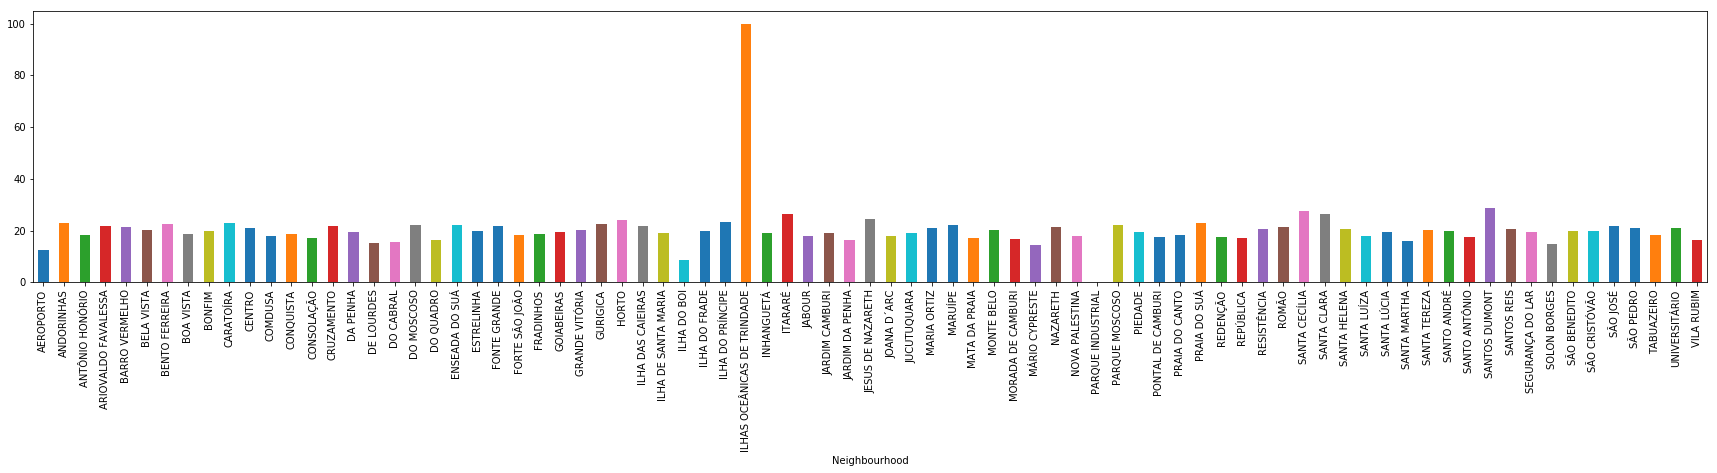

In [14]:
# print df[df.NoShow == 'Yes'].groupby('Neighbourhood')['NoShow'].count().plot(kind='bar', figsize=(30,5))
appointments_made_per_neighbourhood = df.groupby('Neighbourhood')['NoShow'].count()
appointments_no_show_per_neighbourhood = df[df.NoShow == 'Yes'].groupby('Neighbourhood')['NoShow'].count()
percentage_of_appointments_no_show_per_neighbourhood = (appointments_no_show_per_neighbourhood/appointments_made_per_neighbourhood)*100
percentage_of_appointments_no_show_per_neighbourhood.plot(kind='bar', figsize=(30,5))

* From the graph above it seems that in neighbourhood = 'Ilhas Oceanicas De Trindade', people have high tendency to not show at appointment and in neighbourhood = 'Parque Industrial', people have very low tendency to not show at the appointment.

### e) Having enrollment in Brasilian welfare program Bolsa Família (or Scholarship)

In [15]:
total_appointments_having_scholarship = float(df[df.Scholarship == 'Yes']['Scholarship'].count())
total_appointments_having_scholarship_no_show = float(df[(df.Scholarship == 'Yes') & (df.NoShow == 'Yes')]['Scholarship'].count())
percent_of_appointments_having_scholarship_no_show = (total_appointments_having_scholarship_no_show/total_appointments_having_scholarship)*100
total_appointments_not_having_scholarship = float(df[df.Scholarship == 'No']['Scholarship'].count())
total_appointments_not_having_scholarship_no_show = float(df[(df.Scholarship == 'No') & (df.NoShow == 'Yes')]['Scholarship'].count())
percent_of_appointments_not_having_scholarship_no_show = (total_appointments_not_having_scholarship_no_show/total_appointments_not_having_scholarship)*100
print "Percentage of patients having scholarship and didn't show up: {}".format(percent_of_appointments_having_scholarship_no_show)
print "Percentage of patients not having scholarship and didn't show up: {}".format(percent_of_appointments_not_having_scholarship_no_show)

Percentage of patients having scholarship and didn't show up: 23.7363042077
Percentage of patients not having scholarship and didn't show up: 19.8057356158


* From the above result it seems that the patients having scholarship have more tendency to not show up at the apppointment than the patients not having scholarship.

### f) Having Hypertension

In [16]:
total_appointments_having_hypertension = float(df[df.Hipertension == 'Yes']['Hipertension'].count()) 
total_appointments_having_hypertension_no_show = float(df[(df.Hipertension == 'Yes') & (df.NoShow == 'Yes')]['Hipertension'].count())
percent_of_appointments_having_hypertension_no_show = (total_appointments_having_hypertension_no_show/total_appointments_having_hypertension)*100
total_appointments_not_having_hypertension = float(df[df.Hipertension == 'No']['Hipertension'].count())
total_appointments_not_having_hypertension_no_show = float(df[(df.Hipertension == 'No') & (df.NoShow == 'Yes')]['Hipertension'].count())
percent_of_appointments_not_having_hypertension_no_show = (total_appointments_not_having_hypertension_no_show/total_appointments_not_having_hypertension)*100
print "Percentage of patients having hypertension and didn't show up: {}".format(percent_of_appointments_having_hypertension_no_show)
print "Percentage of patients not having hypertension and didn't show up: {}".format(percent_of_appointments_not_having_hypertension_no_show)

Percentage of patients having hypertension and didn't show up: 17.3027522936
Percentage of patients not having hypertension and didn't show up: 20.9019488497


* From the above result it seems that the patients not having hypertension have more tendency to not show up at the apppointment than the patients having hypertension.

### g) Having Diabetes

In [17]:
total_appointments_having_diabetes = float(df[df.Diabetes == 'Yes']['Diabetes'].count()) 
total_appointments_having_diabetes_no_show = float(df[(df.Diabetes == 'Yes') & (df.NoShow == 'Yes')]['Diabetes'].count())
percent_of_appointments_having_diabetes_no_show = (total_appointments_having_diabetes_no_show/total_appointments_having_diabetes)*100
total_appointments_not_having_diabetes = float(df[df.Diabetes == 'No']['Diabetes'].count())
total_appointments_not_having_diabetes_no_show = float(df[(df.Diabetes == 'No') & (df.NoShow == 'Yes')]['Diabetes'].count())
percent_of_appointments_not_having_diabetes_no_show = (total_appointments_not_having_diabetes_no_show/total_appointments_not_having_diabetes)*100
print "Percentage of patients having diabetes and didn't show up: {}".format(percent_of_appointments_having_diabetes_no_show)
print "Percentage of patients not having diabetes and didn't show up: {}".format(percent_of_appointments_not_having_diabetes_no_show)

Percentage of patients having diabetes and didn't show up: 18.0032733224
Percentage of patients not having diabetes and didn't show up: 20.3614880674


* From the above result it seems that the patients having diabetes have more tendency to show up at the apppointment than the patients not having diabetes.

### h) Alcoholism

In [18]:
total_appointments_having_alcoholism = float(df[df.Alcoholism == 'Yes']['Alcoholism'].count()) 
total_appointments_having_alcoholism_no_show = float(df[(df.Alcoholism == 'Yes') & (df.NoShow == 'Yes')]['Alcoholism'].count())
percent_of_appointments_having_alcoholism_no_show = (total_appointments_having_alcoholism_no_show/total_appointments_having_alcoholism)*100
total_appointments_not_having_alcoholism = float(df[df.Alcoholism == 'No']['Alcoholism'].count())
total_appointments_not_having_alcoholism_no_show = float(df[(df.Alcoholism == 'No') & (df.NoShow == 'Yes')]['Alcoholism'].count())
percent_of_appointments_not_having_alcoholism_no_show = (total_appointments_not_having_alcoholism_no_show/total_appointments_not_having_alcoholism)*100
print "Percentage of patients having alcoholism and didn't show up: {}".format(percent_of_appointments_having_alcoholism_no_show)
print "Percentage of patients not having alcoholism and didn't show up: {}".format(percent_of_appointments_not_having_alcoholism_no_show)

Percentage of patients having alcoholism and didn't show up: 20.1488095238
Percentage of patients not having alcoholism and didn't show up: 20.1933575341


* From the above result it seems that alcoholism doesn't not affect if the patient will show up at the appointment or not.

### i) Handicap

In [19]:
total_appointments_having_handicap = float(df[df.Handicap == 'Yes']['Handicap'].count()) 
total_appointments_having_handicap_no_show = float(df[(df.Handicap == 'Yes') & (df.NoShow == 'Yes')]['Handicap'].count())
percent_of_appointments_having_handicap_no_show = (total_appointments_having_handicap_no_show/total_appointments_having_handicap)*100
total_appointments_not_having_handicap = float(df[df.Handicap == 'No']['Handicap'].count())
total_appointments_not_having_handicap_no_show = float(df[(df.Handicap == 'No') & (df.NoShow == 'Yes')]['Handicap'].count())
percent_of_appointments_not_having_handicap_no_show = (total_appointments_not_having_handicap_no_show/total_appointments_not_having_handicap)*100
print "Percentage of patients that are handicap and didn't show up: {}".format(percent_of_appointments_having_handicap_no_show)
print "Percentage of patients that aren't handicap and didn't show up: {}".format(percent_of_appointments_not_having_handicap_no_show)

Percentage of patients that are handicap and didn't show up: 17.8115799804
Percentage of patients that aren't handicap and didn't show up: 20.2360503131


* From the above result it seems that the patients that are handicap have more tendency to show up at the apppointment than the patients that aren't handicap.

### j) SMS alert recieved

In [20]:
total_appointments_recieved_sms = float(df[df.SMSRecieved == 'Yes']['SMSRecieved'].count()) 
total_appointments_recieved_sms_no_show = float(df[(df.SMSRecieved == 'Yes') & (df.NoShow == 'Yes')]['SMSRecieved'].count())
percent_of_appointments_recieved_sms_no_show = (total_appointments_recieved_sms_no_show/total_appointments_recieved_sms)*100
total_appointments_not_recieved_sms = float(df[df.SMSRecieved == 'No']['SMSRecieved'].count())
total_appointments_not_recieved_sms_no_show = float(df[(df.SMSRecieved == 'No') & (df.NoShow == 'Yes')]['SMSRecieved'].count())
percent_of_appointments_not_recieved_sms_no_show = (total_appointments_not_recieved_sms_no_show/total_appointments_not_recieved_sms)*100
print "Percentage of patients that recieved sms and didn't show up: {}".format(percent_of_appointments_recieved_sms_no_show)
print "Percentage of patients that didn't recieved sms and didn't show up: {}".format(percent_of_appointments_not_recieved_sms_no_show)

Percentage of patients that recieved sms and didn't show up: 27.5753220033
Percentage of patients that didn't recieved sms and didn't show up: 16.7008715584


* From the above result it seems that the patients that didn't recieve sms alert have more tendency to show up at the apppointment than the patients that did recieve sms alert.

<a id='rq2'></a>
### Research Question 2  (Show a visulaization for the dataset.)

* I will show a histogram of the dataset with respect to Day of the week and I will find whether more number of appointments are made on weekdays  or weekends.

Text(0,0.5,u'Frequency / No of appointments')

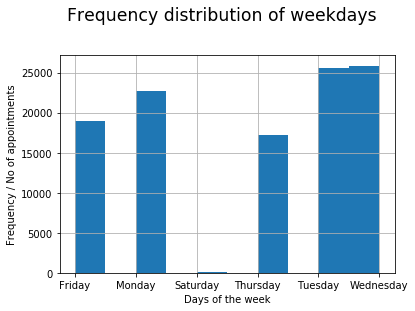

In [30]:
ax = df.DayofTheWeek.hist()
# set title and axis labels
plt.suptitle('Frequency distribution of weekdays', x=0.5, y=1.05, ha='center', fontsize='xx-large')
# Set the x-axis label
ax.set_xlabel("Days of the week")
# Set the y-axis label
ax.set_ylabel("Frequency / No of appointments")

* from the above Histogram it is clear that more number of appointments are made on weekdays than weekends.

<a id='conclusions'></a>
## Conclusions

#### The above analysis can be concluded as:

> Gender and Alcoholism does not play a role in determining whether a patient is likely to turn up for their future appointments or not.

> All other features seem to play an important role in determining whether a patient is likely to turn up for their future appointments or not.

> LIMITATIONS: The dataset is spread over April, May and June and therefore it doesn't provide a representative sample for predicting whether a patient is likely to not show up on a date outside of those days. If the dataset would be spread over all the months in a year, the results would be different. Many features like employment type (business / service), income, etc also play role in predicting whether a patient is likely to show up or not. 